## ESCI 895
## Ryan Siegel
## Final Project
## Heat Flow of Water Through The Riparian Enviornment of the Zealand River and Hale Brook

### The Zealand River Study Area
### Created By River Khoriaty and Ryan Omslaer
<img src="image.png" width="400" height="500"/>
<img src="Zealand Google Earth.png" width="400" height="500"/>

The above study location is located in the White Mountains of northern New Hampshire. The site has undergone a restoration project that diverts the main flow of water to the Zealand River (eastern stream) away from Hale Brook (western stream). This is a riparian environment with a shallow water table located between the two streams, where the forested area can thrive.


Thanks to the research conducted by Dr. Lightbody, Ryan Omslear, and River Khoriaty, it is known that the Zealand River is a losing stream, and Hale Brook is a gaining stream, with groundwater acting as a conduit between them. Another way to see this relationship between the stream and the groundwater is to use heat flow as a tool (USGS, 2003).


The temperature of a stream strongly impacts the ecology of that environment. Trout call Hale Brook home, and these fish thrive in colder waters. If Hale Brook is now gaining steam due to the stream diversion project, is the local wildlife going to suffer from higher temperature groundwater, or is the groundwater flow keeping the temperature of Hale Brook at a comfortable temperature?


Using surface water temperature and groundwater temperature from 11 wells, provided by River Khoriaty, and radiation data from National Ecological Observatory Network (NEON). Data was collected from June to September 2025. Heat flow due to radiation of surface water in the streams, the heat flow due to conduction into the groundwater, and their relationship to each other can be calculated. This can help the understanding of how heat flow is a core variable in this riparian environment. This can also help in solidifying the claim that the flow of water is from the Zealand River into Hale Brook.

### Import Libraries

In [118]:
import pandas as pd
import matplotlib
import numpy as np
import os
from pathlib import Path
import scipy.stats
import glob
import matplotlib.pyplot as plt

### Parameters

In [119]:
gw = Path("gw data")
sw = Path("Surface water files")
first = Path("gw data")/"gw_ll05_09_15_2025.csv"
radiation = Path('Rad Data')
aquifer_k = 2 #W/m/K Up to change
L = 2 #Length in Meters Ground Water to Surface Water
GW_Area = 4 #Area in Sq M, based on Length Measurement Used
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²·K⁴)
albedo = 0.06    # typical for water
emissivity = 0.97

### Function for Loading in Water Temp Data

In [120]:

def load_filtered_w_data_pivoted(folder_path):
    folder = Path(folder_path)
    all_dfs = []

    for file in folder.glob("*.csv"):
        try:
            # Extract well/site ID from filename
            well_id = file.stem

            df = pd.read_csv(file, skiprows=11, encoding='latin1', sep=',', engine='python')
            df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed', errors='coerce')
            df.dropna(subset=['DateTime'], inplace=True)
            df.set_index('DateTime', inplace=True)

            # Filter: on the hour and every two hours
            mask = (df.index.minute == 0) & (df.index.second == 0) & (df.index.hour % 2 == 0)
            filtered = df[mask].copy()

            # Drop unnecessary columns
            filtered.drop(columns=['Date', 'Time', 'ms'], errors='ignore', inplace=True)

            # Rename columns to include well ID
            filtered.columns = [f"{col}_{well_id}" for col in filtered.columns]

            # Keep only columns that contain 'TEMPERATURE' (case-insensitive)
            temperature_cols = [col for col in filtered.columns if 'TEMPERATURE' in col.upper()]
            filtered = filtered[temperature_cols]

            # Replace 0s with NaN only in temperature columns
            filtered = filtered.replace(0, np.nan)

            # Interpolate only the replaced 0s (preserving original NaNs)
            interpolated = filtered.interpolate(limit_direction='both')

            # Restore original NaNs (if any) by masking only the replaced 0s
            filtered = filtered.where(filtered != 0, interpolated)

            all_dfs.append(filtered)

        except Exception as e:
            print(f"Error processing {file.name}: {e}")

    # Combine all filtered DataFrames on DateTime index
    if all_dfs:
        combined_df = pd.concat(all_dfs, axis=1)
        combined_df.sort_index(inplace=True)
        return combined_df
    else:
        return pd.DataFrame()


### Load Groundwater Temperature Data

In [121]:
dfgw = load_filtered_w_data_pivoted(gw)
dfgw

,TEMPERATURE_gw_ll02_09_15_2025,TEMPERATURE_gw_ll03_08_22_2025,TEMPERATURE_gw_ll03_09_15_2025,TEMPERATURE_gw_ll04_09_15_2025,TEMPERATURE_gw_ll05_08_22_2025,TEMPERATURE_gw_ll05_09_15_2025,TEMPERATURE_gw_ll08_09_15_2025
DateTime,,,,,,,
2025-06-02 14:00:00,NaN,8.444,NaN,6.665,8.915,NaN,8.781
2025-06-02 16:00:00,NaN,8.442,NaN,6.630,8.895,NaN,8.748
2025-06-02 18:00:00,NaN,8.435,NaN,6.612,8.871,NaN,8.719
2025-06-02 20:00:00,NaN,8.429,NaN,6.597,8.846,NaN,8.693
2025-06-02 22:00:00,NaN,8.423,NaN,6.583,8.822,NaN,8.671
...,...,...,...,...,...,...,...
2025-09-15 04:00:00,11.828,NaN,13.255,10.471,NaN,13.192,13.531
2025-09-15 06:00:00,11.824,NaN,13.252,10.462,NaN,13.189,13.518
2025-09-15 08:00:00,11.822,NaN,13.249,10.455,NaN,13.182,13.508


### Load Surface Water Temperatures

In [122]:
dfsw = load_filtered_w_data_pivoted(sw)

dfsw

Error processing sw_ll01_06_05_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_07_14_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_08_18_2025_cond.csv: 'Date'
Error processing sw_ll11_09_15_2025_cond.csv: 'Date'


,TEMPERATURE_sw_ll01_06_03_2025,TEMPERATURE_sw_ll01_06_04_2025,TEMPERATURE_sw_ll01_09_15_2025,TEMPERATURE_sw_ll06_08_22_2025,TEMPERATURE_sw_ll06_09_15_2025,TEMPERATURE_sw_ll07_06_02_2025,TEMPERATURE_sw_ll07_09_15_2025,TEMPERATURE_sw_ll09_09_15_2025,TEMPERATURE_sw_ll10_06_02_2025,TEMPERATURE_sw_ll10_09_15_2025,TEMPERATURE_sw_ll11_08_22_2025
DateTime,,,,,,,,,,,
2025-05-30 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-30 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.647,NaN,NaN
2025-05-30 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.118,NaN,NaN
2025-05-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.676,NaN,NaN
2025-05-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.306,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15 06:00:00,NaN,NaN,11.170,NaN,11.557,NaN,11.265,NaN,NaN,12.599,NaN
2025-09-15 08:00:00,NaN,NaN,10.828,NaN,11.099,NaN,11.097,NaN,NaN,12.344,NaN
2025-09-15 10:00:00,NaN,NaN,11.425,NaN,11.698,NaN,12.506,NaN,NaN,12.501,NaN


## First looking at the relationship between the Zealand River surface water and the groundwater to the west of the stream.

### Compute Average GW Temperature Between Zealand and Hale Brook

In [123]:
dfgw['average_between'] = dfgw[['TEMPERATURE_gw_ll03_08_22_2025' ,'TEMPERATURE_gw_ll03_09_15_2025',
                                'TEMPERATURE_gw_ll05_08_22_2025', 'TEMPERATURE_gw_ll05_09_15_2025',
                                'TEMPERATURE_gw_ll08_09_15_2025']].mean(axis=1, skipna=True)

### Compute Average SW Temperature in the Zealand

In [124]:
dfsw['average_new_channel'] = (dfsw[['TEMPERATURE_sw_ll01_06_03_2025', 'TEMPERATURE_sw_ll01_06_04_2025',
                         'TEMPERATURE_sw_ll01_09_15_2025', 'TEMPERATURE_sw_ll07_06_02_2025',
                         'TEMPERATURE_sw_ll07_09_15_2025']]).mean(axis=1, skipna=True)

### Time Series of Temperature Over Duration of Study Period

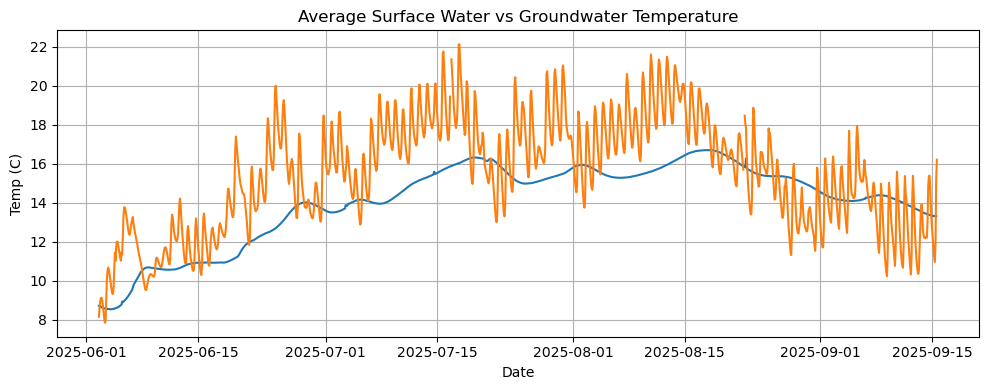

In [125]:
plt.figure(figsize=(10, 4))
plt.plot(dfgw['average_between'], linestyle='-')
plt.plot(dfsw['average_new_channel'], linestyle='-')
plt.title('Average Surface Water vs Groundwater Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (C)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Calculate Heat Flow From Surface Water To Ground Water Due to Conduction of Aquifer Material

In [126]:
df_heatflow = pd.DataFrame({
    'GWtoSW': aquifer_k * GW_Area * (((dfsw['average_new_channel'] - dfgw['average_between'])) / L)})

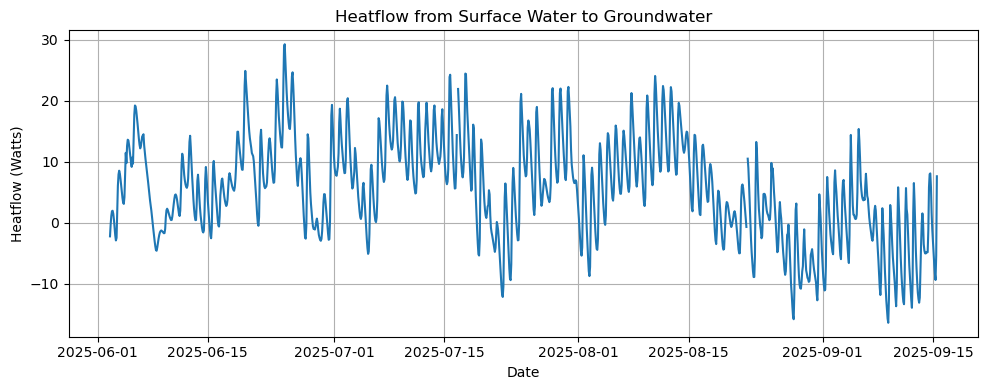

In [127]:
plt.figure(figsize=(10, 4))
plt.plot(df_heatflow['GWtoSW'], linestyle='-')
plt.title('Heatflow from Surface Water to Groundwater')
plt.xlabel('Date')
plt.ylabel('Heatflow (Watts)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Load Radiation Data

In [128]:

def load_and_resample_radiation(folder_path):
    """
    Load all CSVs in a folder, rename 'endDateTime' to 'DateTime', set as index,
    filter to inSWMean and inLWMean columns, and resample to 2-hour totals.
    """
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    dfs = []

    for file in all_files:
        df = pd.read_csv(file, parse_dates=['endDateTime'])

        # Rename and set index
        df.rename(columns={'endDateTime': 'DateTime'}, inplace=True)
        df.set_index('DateTime', inplace=True)

        # Keep only radiation columns
        keep_cols = [col for col in df.columns if 'inSWMean' in col or 'inLWMean' in col or 'outLWMean' in col]
        df = df[keep_cols]

        # Resample to 2-hour intervals, summing radiation
        df_resampled = df.resample('2h').sum()

        dfs.append(df_resampled)

    # Combine all resampled DataFrames
    combined = pd.concat(dfs)
    combined.sort_index(inplace=True)
    return combined
dfrad = load_and_resample_radiation(radiation)
dfrad

,inSWMean,inLWMean,outLWMean
DateTime,,,
2025-05-01 00:00:00+00:00,-12.42,782.4,1057.3
2025-05-01 02:00:00+00:00,-17.40,1017.0,1381.5
2025-05-01 04:00:00+00:00,-14.31,1032.9,1361.5
2025-05-01 06:00:00+00:00,-10.67,1116.7,1368.5
2025-05-01 08:00:00+00:00,-15.63,997.2,1361.6
...,...,...,...
2025-08-31 16:00:00+00:00,3429.61,1289.6,1745.0
2025-08-31 18:00:00+00:00,3280.97,1352.5,1775.2
2025-08-31 20:00:00+00:00,1945.38,1284.2,1749.0


### Calculate Heat Flow Due to Radiation to Surface Water

In [129]:
# Convert surface temperature to Kelvin if needed
temp_K = dfsw['average_new_channel'].copy()
if temp_K.max() < 200:  # assume it's in Celsius
    temp_K += 273.15

# Shortwave net (reflected portion removed)
sw_net = dfrad['inSWMean'] * (1 - albedo)

# Longwave incoming
lw_in = dfrad['inLWMean']

# Longwave outgoing: use column if available, else compute via Stefan-Boltzmann
if 'outLWMean' in dfrad.columns:
    lw_out = dfrad['outLWMean']
else:
    lw_out = emissivity * sigma * temp_K**4

# Net radiative heat flux (W/m²)
q_net = sw_net + lw_in - lw_out

## Works Cited
#### Stonestrom, D. A., Constantz, J., & Survey (U.S.), G. (2003). Heat as a Tool for Studying the Movement of Ground Water Near Streams. U.S. Department of the Interior, U.S. Geological Survey. https://books.google.com/books?id=xMPJ90rhi5wC
#### Kersten, M. S. (1948). The thermal conductivity of soils. In Proceedings, Highway Research Board (Vol. 28, pp. 391-409).
